In [1]:
import read_activations
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

/Users/richard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=False)
img_path = 'test.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
a = read_activations.get_activations(model, x, True)

----- activations -----
(1, 224, 224, 3)
(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

Displaying activation map 0
Displaying activation map 1
Displaying activation map 2
Displaying activation map 3
Displaying activation map 4
Displaying activation map 5
Displaying activation map 6
Displaying activation map 7
Displaying activation map 8
Displaying activation map 9
Displaying activation map 10
Displaying activation map 11
Displaying activation map 12
Displaying activation map 13
Displaying activation map 14
Displaying activation map 15
Displaying activation map 16
Displaying activation map 17
Displaying activation map 18


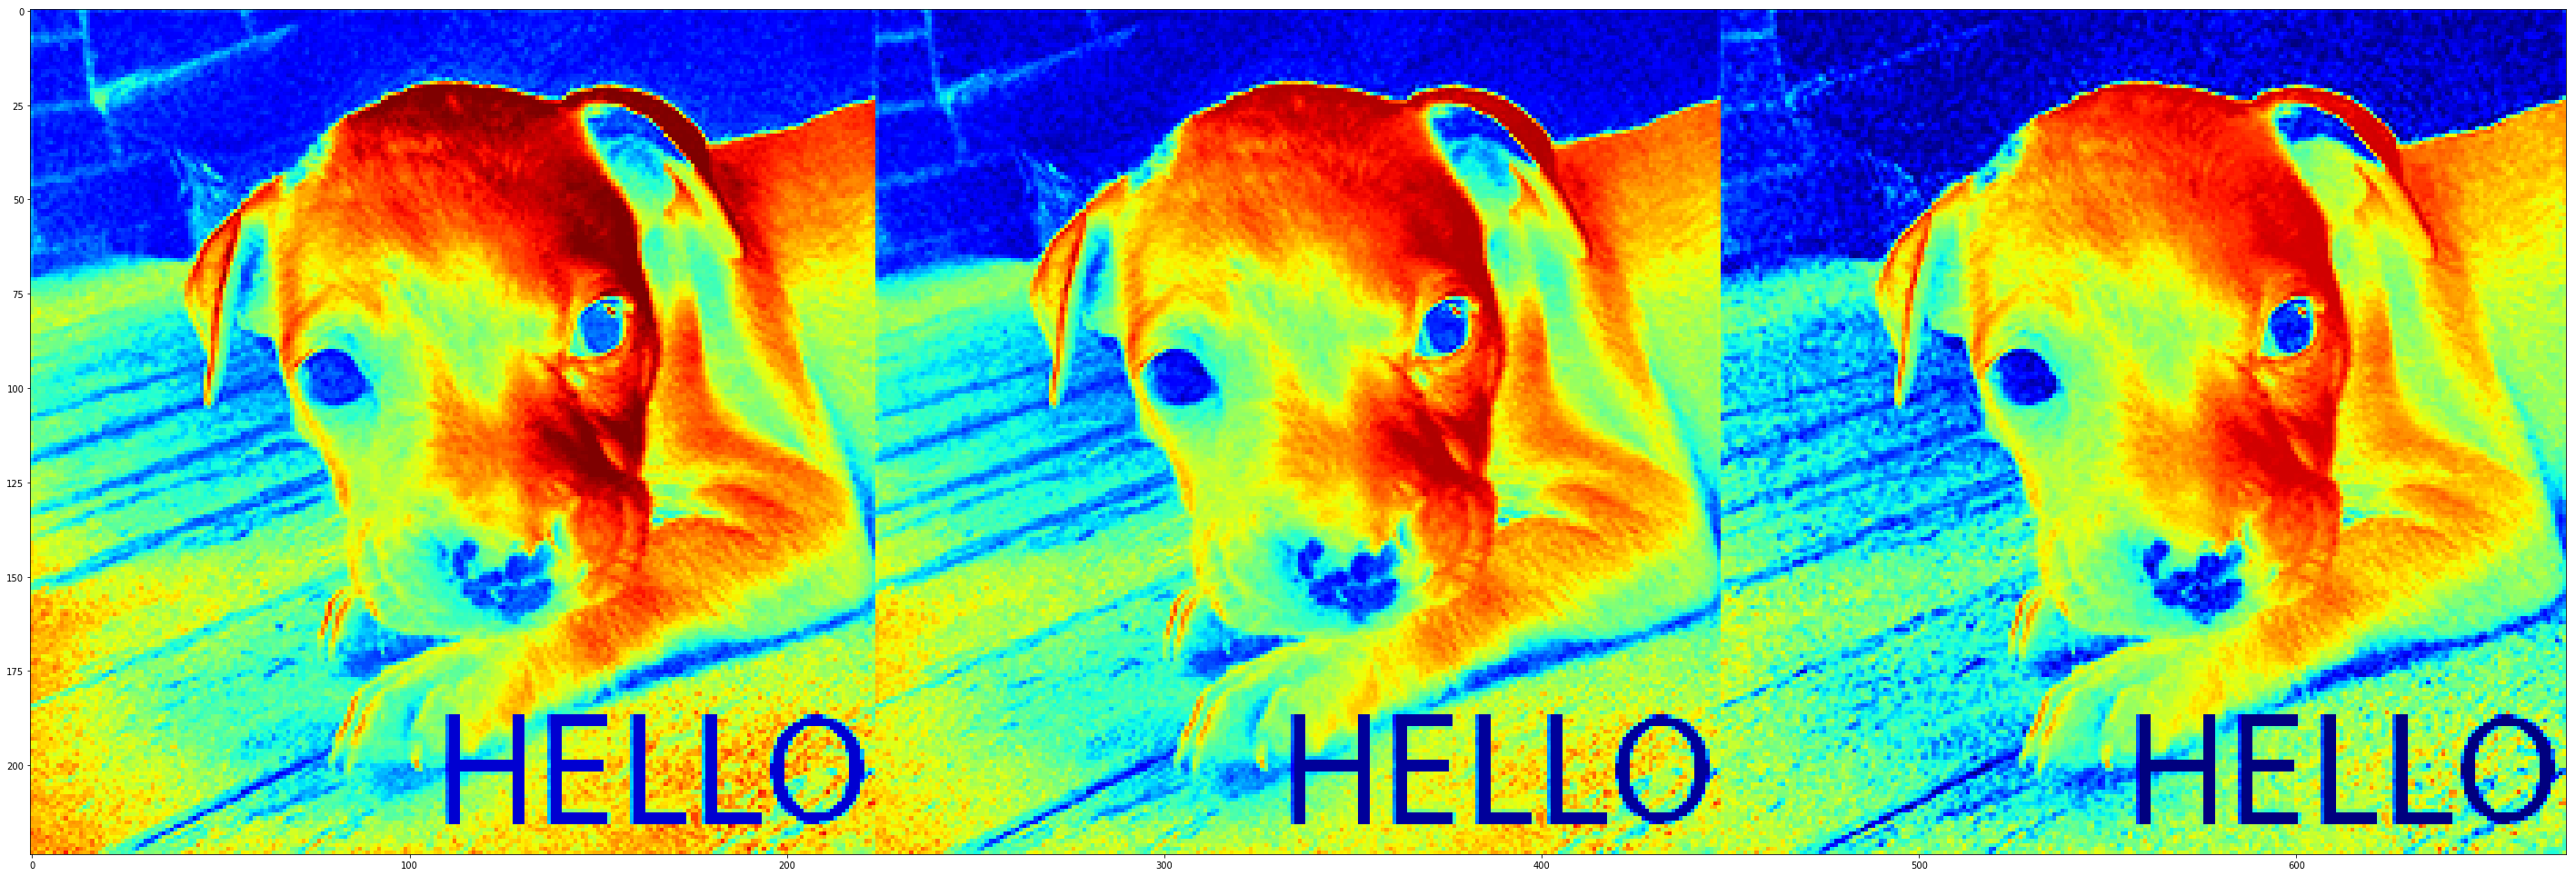

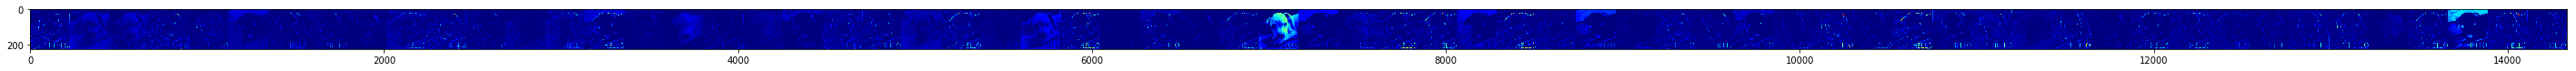

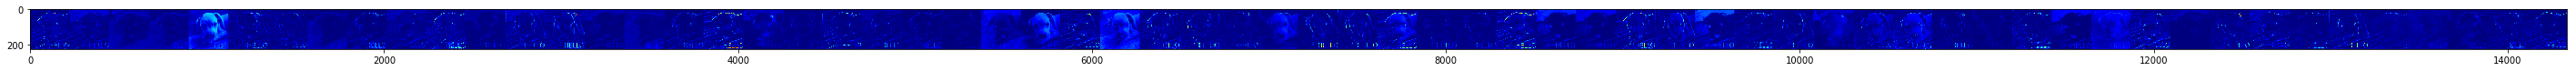

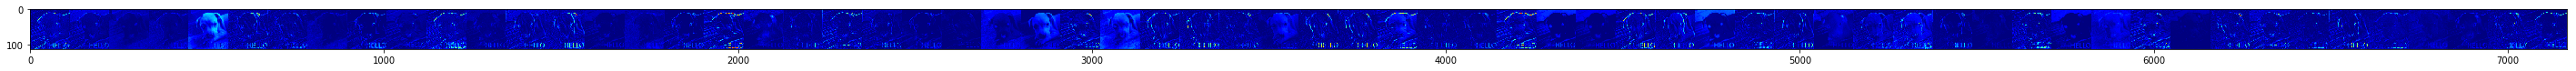

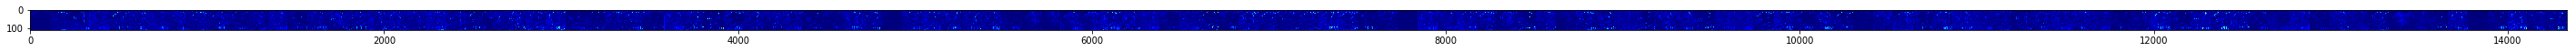

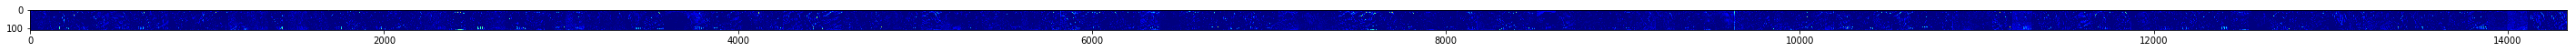

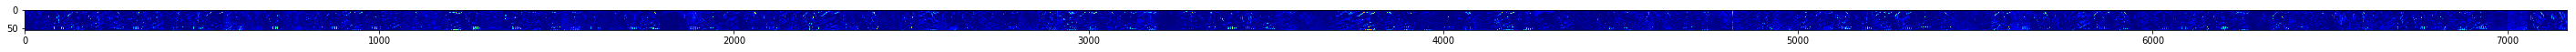

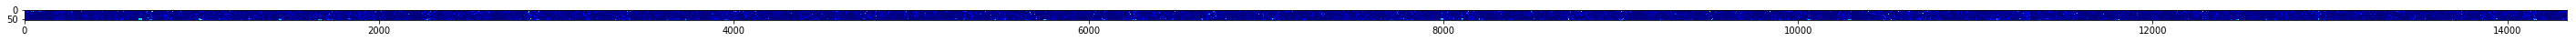

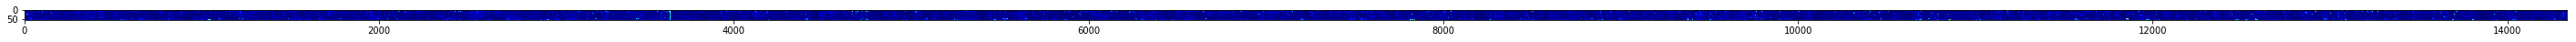

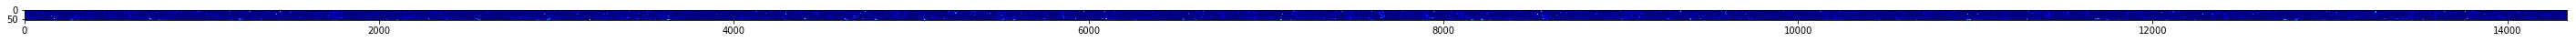

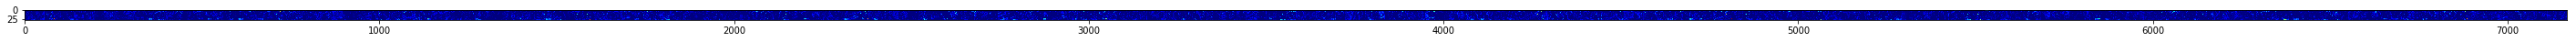

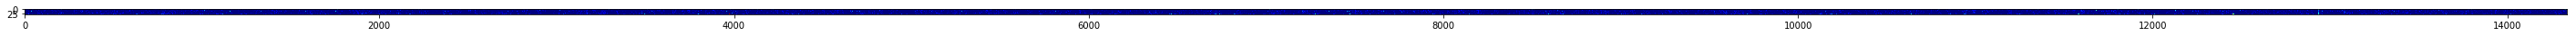

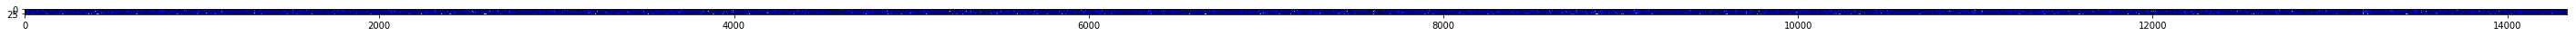

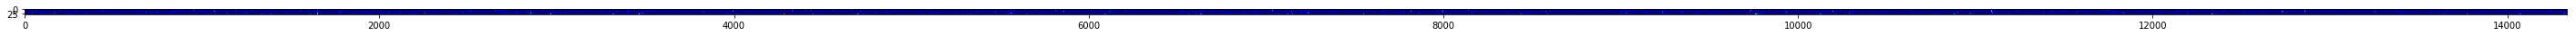

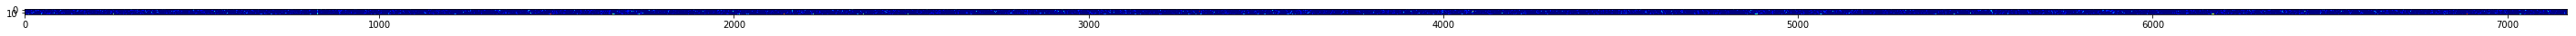

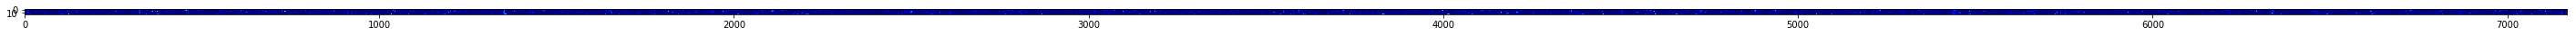

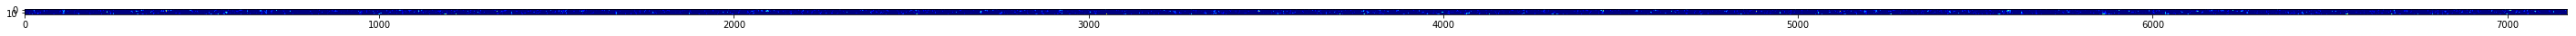

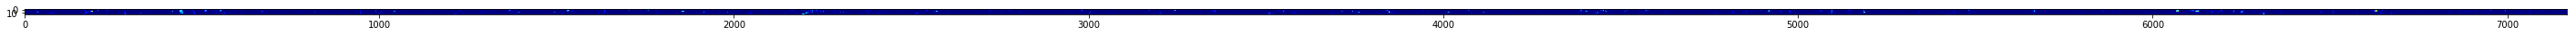

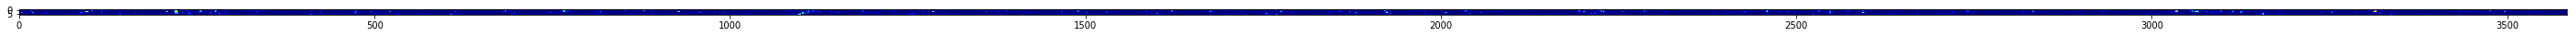

In [3]:
%matplotlib inline
activation_maps = a
batch_size = activation_maps[0].shape[0]
for i, activation_map in enumerate(activation_maps):
    print('Displaying activation map {}'.format(i))
    activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
    plt.figure(figsize=(50,50))
    plt.imshow(activations, interpolation='None', cmap='jet')
    plt.savefig(str(i)+".png", dpi=200)
